In [15]:
#test reading review data
import pandas as pd
import matplotlib.pyplot as plt
path1 = '/Users/leahtan/Desktop/Magazine_Subscriptions.json' #2018
path2 = '/Users/leahtan/Desktop/Magazine_Subscriptions.jsonl' #2023
# Read the JSON file to df
df1 = pd.read_json(path1, lines=True)#old
df2 = pd.read_json(path2, lines=True)#new

In [32]:
#define a function with dfs as input, return the 5-star reviews dropped in 2023 dataset
def get_5star_dropped(df_old, df_new):
    #get year colum
    df_old['year'] = df_old['reviewTime'].apply(lambda x: int(x.split(', ')[1]))
    df_new['year'] = pd.to_datetime(df_new['timestamp']).dt.year
    #print year range of df1 and df2
    print(f"Year range of df old: {df_old['year'].min()} - {df_old['year'].max()}")
    print(f"len of df_old: {len(df_old)}")
    print(f"unique products in df_old: {len(df_old['asin'].unique())}")
    df_old['overall'].value_counts().sort_index().plot(kind='bar')
    plt.show()
    print(f"Year range of df new: {df_new['year'].min()} - {df_new['year'].max()}")
    print(f"len of df_new: {len(df_new)}")
    print(f"unique products in df_new: {len(df_new['asin'].unique())}")
    df_new['rating'].value_counts().sort_index().plot(kind='bar')
    plt.show()

    #common year range
    common_years = [year for year in df_old['year'].unique() if year in df_new['year'].unique()]
    print(f"Common years: {common_years}")

    #filter asin for reviews that are in both df_old and df_new
    # filtered = df_old[df_old['reviewText'].isin(df_new['text'])]
    # asin_ls = filtered['asin'].unique()
    asin_ls = [asin for asin in df_old['asin'].unique() if asin in df_new['asin'].unique()]
    print(f"len of ASINs in both df_old and df_new: {len(asin_ls)}")

    df_old = df_old[(df_old['asin'].isin(asin_ls))&(df_old['year'].isin(common_years))]
    df_new = df_new[(df_new['asin'].isin(asin_ls))& (df_new['year'].isin(common_years))]
    print(f"len of df_old: {len(df_old)}")
    print(f"len of df_new: {len(df_new)}")
    
    #compare review text, get the missing ones
    df_dropped = df_old[~df_old['reviewText'].isin(df_new['text'])]
    print(f"len of df_dropped (all stars): {len(df_dropped)}")
    df_dropped['overall'].value_counts().sort_index().plot(kind='bar')
    plt.show()
    df_dropped = df_old[df_old['overall'] == 5]
    df_dropped = df_dropped.sort_values(by='asin', ascending=False).reset_index(drop=True)
    print(f"len of df_dropped (5 stars): {len(df_dropped)}")
    return df_dropped

Year range of df old: 2001 - 2018
len of df_old: 89689
unique products in df_old: 2428


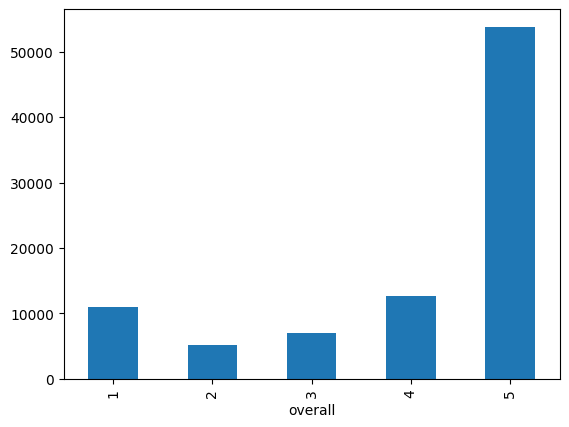

Year range of df new: 2001 - 2023
len of df_new: 71497
unique products in df_new: 3391


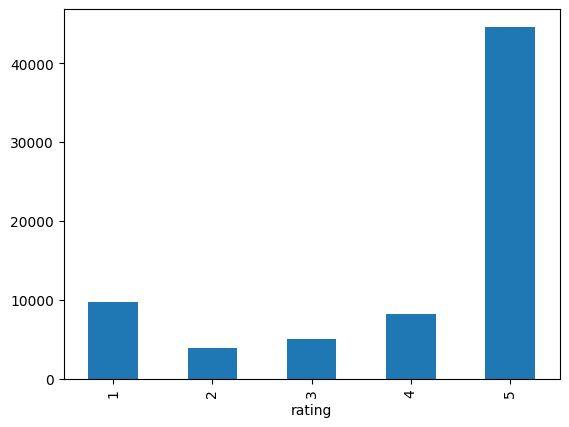

Common years: [2001, 2007, 2006, 2014, 2013, 2012, 2002, 2011, 2005, 2004, 2003, 2010, 2015, 2018, 2017, 2009, 2016, 2008]
len of ASINs in both df_old and df_new: 1558
len of df_old: 62414
len of df_new: 23759
len of df_dropped (all stars): 41563


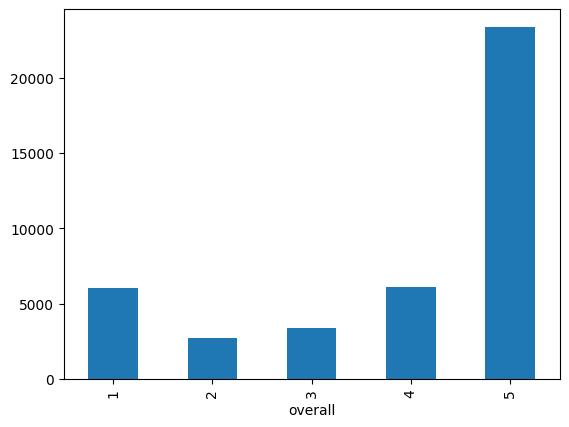

len of df_dropped (5 stars): 37550


In [33]:
df_dropped = get_5star_dropped(df1, df2)

In [34]:
df_dropped

,overall,vote,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,style,image,year
0,5,9,False,"09 27, 2005",AFFS70PP6KUX5,B01HI8V1I6,Joel,Tired of Car Magazines that are little more th...,Independence RULES!,1127779200,NaN,NaN,2005
1,5,NaN,False,"09 5, 2005",A2TLB8LC01H7XY,B01HI8V1I6,Dr. Charles E. Ellis,Classic Motorsports and their sister magazine ...,Throw your other classic car magazines away,1125878400,NaN,NaN,2005
2,5,NaN,True,"05 31, 2018",A3GG4OIHEINW3V,B01HI8V1I6,Susan F. Ellis,Great mag for someone who loves old British ra...,NOT a muscle car magazine,1527724800,NaN,NaN,2018
3,5,NaN,True,"01 25, 2018",A2JS3SSTUOC5SH,B01HI8V1I6,Mikeeidie,Given as a gift and was much appreciated.,Five Stars,1516838400,NaN,NaN,2018
4,5,NaN,True,"11 18, 2017",A3USDWUW2JJZKM,B01HI8V1I6,BW,A fun read on great cars,Great if you are into the classic sports cars,1510963200,NaN,NaN,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...
37545,5,6,True,"03 14, 2013",ARPSGH035HXVN,B00005N7NQ,James L. Mason,"Frankly, I found this magazine informative. I...",Reason-able,1363219200,{'Format:': ' Kindle Edition'},NaN,2013
37546,5,NaN,True,"03 4, 2013",A3F1AQHQLS41IV,B00005N7NQ,John D. Martin,This magazine dares to say what everyone is al...,A Breath of Fresh Air,1362355200,{'Format:': ' Print Magazine'},NaN,2013
37547,5,NaN,True,"03 2, 2013",A12AZEN39APFWW,B00005N7NQ,M. R. Bergeron,"Expert writing, profound commentary and comple...",Best Libertarian magazine out there,1362182400,{'Format:': ' Print Magazine'},NaN,2013
37548,5,9,True,"01 10, 2013",A3865A28FVFFZO,B00005N7NQ,David Wright,You should NOT read Reason simply to reinforce...,And now for something completely different...,1357776000,{'Format:': ' Kindle Edition'},NaN,2013


In [35]:
df2[df2['asin'] == 'B01HI8V1I6']

,rating,title,text,images,asin,parent_asin,user_id,timestamp,helpful_vote,verified_purchase,year
17700,5,Nostalgic muscle cars,Excellent photos of classic cars. Great magazi...,[],B01HI8V1I6,B01HI8V1I6,AHZD2MPHX4XG7GPXIZEOYRCLYU6A,2016-12-12 15:13:03,3,True,2016


In [36]:
df1[df1['asin'] == 'B01HI8V1I6']

,overall,vote,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,style,image,year
74636,5,4,False,"08 24, 2005",A355DTMYCH0ABL,B01HI8V1I6,Michael Pearce,I used to have to buy British magazines to get...,The best American Classic Sports Car Magazine,1124841600,NaN,NaN,2005
74637,5,14,False,"08 5, 2005",A175JOHM7LX9VG,B01HI8V1I6,PattonD,"We get several magazines at my house, I typica...",Classic Motorsports is a Great Read,1123200000,NaN,NaN,2005
74638,4,4,False,"08 5, 2005",A35L1SV2KD3JGQ,B01HI8V1I6,M. Bryce Ludwig,I've been a long time reader of Grassroots Mot...,Good magazine verging on great,1123200000,NaN,NaN,2005
74639,5,3,False,"04 27, 2005",AFVKQ2Q92N6NJ,B01HI8V1I6,M. Meade,Classic Motorsports is truly a great magazine....,Great Magazine with a vintage racing slant.,1114560000,NaN,NaN,2005
74640,5,2,True,"07 26, 2014",A3OIE7IE9LTPJG,B01HI8V1I6,GatorMan,If you like old british cars - this is your ma...,Great Mag for British Car Fans,1406332800,NaN,NaN,2014
74641,5,2,True,"10 19, 2013",A10V8KC7G4RQT1,B01HI8V1I6,R. Wachtel,I subscribed to this magazine many years ago a...,a very classy publication,1382140800,NaN,NaN,2013
74642,5,4,True,"09 19, 2013",APAI121O2LRXU,B01HI8V1I6,MGBguy,Classic Motorsports does an admirable job of i...,"You appreciate the classics, or you don't.",1379548800,NaN,NaN,2013
74643,5,2,True,"02 26, 2013",A10PTYA24QOBS7,B01HI8V1I6,Veline,Men are so hard to buy for so this book fit th...,Great Gift for Men,1361836800,NaN,NaN,2013
74644,2,4,False,"08 19, 2012",A3AA74W7ZHLZ7T,B01HI8V1I6,JimD,As each issue arrives it seems to have fewer a...,Seen better days....,1345334400,NaN,NaN,2012
74645,5,10,False,"09 28, 2005",ASI72JKM36OCA,B01HI8V1I6,C. Senechal,"Ok, I love cars but when I read some car magaz...",Great Magazine!,1127865600,NaN,NaN,2005
